In [77]:
import sys
import serial #para leer la data del arduino uno
import pandas as pd #para volcar esta data en un dataframe y poder trabajarla
import time #para poder loggear el tiempo
import matplotlib.pyplot as plt
import numpy as np

In [78]:
### para ver en que puerto tengo el sensor
import serial.tools.list_ports
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p) 


/dev/cu.WH-CH510 - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem11401 - IOUSBHostDevice


In [89]:
puerto_arduino = '/dev/cu.usbmodem11401' #el puerto que encontramos con el .ino que te devuelve en que puerto esta
baud = 9600 #esta es la velocidad de comunicación entre la compu y el arduino
arduino = serial.Serial(port=puerto_arduino, baudrate=baud) 
print('Conectado exitosamente al puerto:' + puerto_arduino)
audio_data = np.array([])
frec_muestreo = 1000 #la misma que seteo al arduino
tiempo = 3
try:
    for i in range(tiempo * frec_muestreo):
        data = str(arduino.readline().decode('utf-8').strip())
        print('linea: ' + str(i) + ' : guardando valor ... : ' + data)
        audio_data = np.append(audio_data, int(data))
        time.sleep(1/frec_muestreo)
except KeyboardInterrupt:   
    print('fin toma datos!')
except ValueError:
    pass

arduino.close()
print('fin de toma de datos!')
 

Conectado exitosamente al puerto:/dev/cu.usbmodem11401
linea: 0 : guardando valor ... : 2
linea: 1 : guardando valor ... : 3
linea: 2 : guardando valor ... : 2
linea: 3 : guardando valor ... : 2
linea: 4 : guardando valor ... : 2
linea: 5 : guardando valor ... : 3
linea: 6 : guardando valor ... : 2
linea: 7 : guardando valor ... : 2
linea: 8 : guardando valor ... : 2
linea: 9 : guardando valor ... : 3
linea: 10 : guardando valor ... : 2
linea: 11 : guardando valor ... : 2
linea: 12 : guardando valor ... : 2
linea: 13 : guardando valor ... : 3
linea: 14 : guardando valor ... : 2
linea: 15 : guardando valor ... : 2
linea: 16 : guardando valor ... : 2
linea: 17 : guardando valor ... : 2
linea: 18 : guardando valor ... : 2
linea: 19 : guardando valor ... : 2
linea: 20 : guardando valor ... : 2
linea: 21 : guardando valor ... : 2
linea: 22 : guardando valor ... : 2
linea: 23 : guardando valor ... : 2
linea: 24 : guardando valor ... : 2
linea: 25 : guardando valor ... : 2
linea: 26 : guardan

In [90]:
len(audio_data)

3000

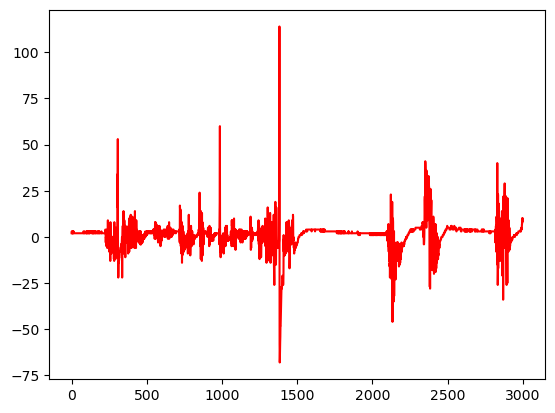

In [91]:
plt.plot(audio_data, color = 'red') #ahora tengo mi onda!!! 

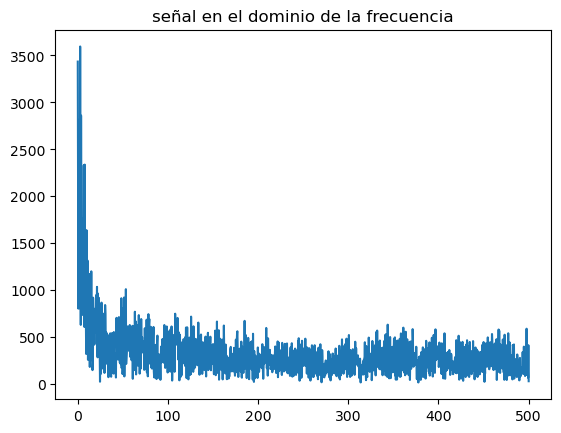

In [92]:

#transformada de Fourier!
s2 = np.fft.rfft(audio_data) # te devuelve intensidades de 'frecuencia', donde cada indice es la intensidad de cada frecuencia. Las freciencias van a ser la mitad de la frecuencia de muestreo por lo menos para el teorema del muestreo.
#funcion para el dominio de la frecuencia
rfrec=np.fft.rfftfreq(tiempo * frec_muestreo, d = 1/frec_muestreo)
plt.title('señal en el dominio de la frecuencia')
plt.plot(rfrec, abs(s2))